# Comparing classifiers

In this part you will compare the classification algorithms seen in this and the previous labs of MALIS course:

1. K nearest neighbors
2. Logistic regression
3. Neural Networks
4. Support Vector Machine (linear)
5. SVM with RBF kernel
6. Classification Tree

You have only to run the cells and answer the questions you can find after the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter("ignore")
from sklearn.exceptions import ConvergenceWarning

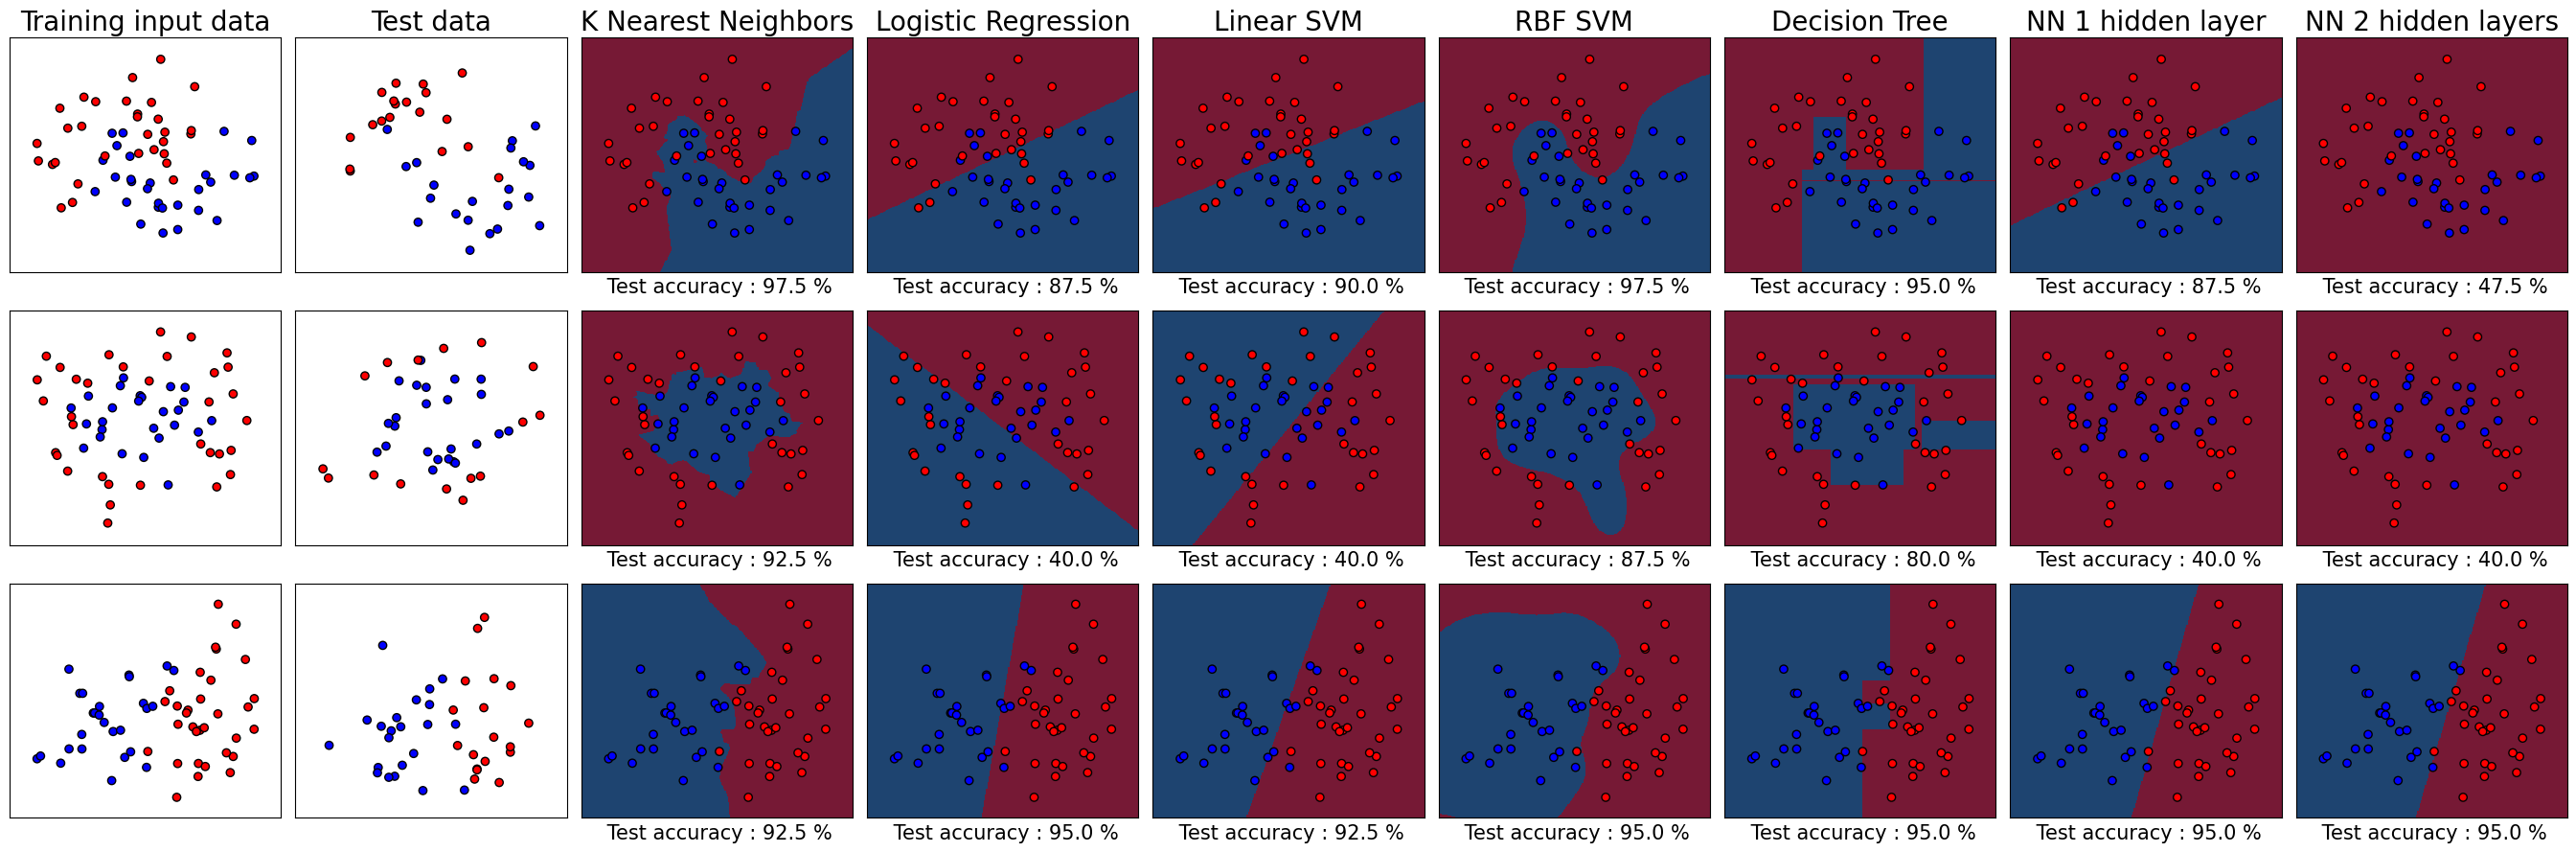

In [2]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(learning_rate_init=0.05, max_iter=3000, hidden_layer_sizes=(10), batch_size=60, learning_rate='constant',  activation='logistic', solver='sgd', tol=1e-4),
    MLPClassifier(learning_rate_init=0.05, max_iter=4000, hidden_layer_sizes=(10, 10), batch_size=60, learning_rate='constant', activation='logistic', solver='sgd', tol=1e-4)]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

## Question 1

Comment the results obtained. Use the following questions to help you.
1. Which classifiers performs poorly? In which datasets? Why?
2. Do you think some classifiers are overfitting?
    1. If yes: which ones? in which datasets? which elements allow you to say that?
    2. If no : what you should see to say that a classifier is overfitting?
3. How does changing the parameters may affect the results?
   (changing K in nearest neighbors, the hardness of the SVM, the gamma of the RBF kernel, the depth of the tree, the number of neurons of the Neural Networks)

Your answers here: 

1. Logistic Regression and Linear SVM: These classifiers perform poorly on the second dataset, both yielding a test accuracy of 40.0%. This poor performance is likely due to the non-linear nature of the datasets, the 1st and 3rd training datasets look linearly separable as the 2nd does not, which these linear models are unable to capture effectively. 

    Neural Networks with 1 and 2 hidden layers: Similar to Logistic Regression and Linear SVM, the neural networks also perform poorly on the second dataset, again with a test accuracy of 40.0%. This could indicate that the models are not complex enough to capture the underlying patterns in the data, or they may not have been trained sufficiently to converge to an optimal solution.

2. Yes. <br>
2.1. The Decision Tree classifier has a high test accuracy on the first dataset but a reduced accuracy on the second and third datasets. Visually, even in the 1st dataset, the decision tree tries to accurately classify the smallest outlier (shown by the split lines) this strongly suggests overfitting.

3. We noticed that an increase in K(K=5) leads to better accuracy on the third dataset (+2.5%) but a decrease in accuracy on the 2nd dataset (-2.5%).
    An increase in gamma of the RBF Kernel from 2 to 4 leads to better accuracy on the 2nd dataset (+2.5%) while other dataset accuracy stayed the same.
    An increase in the depth of the tree from 5 to 9 leads to better accuracy on the 1st and 3rd dataset (+2.5%) but worse on the 2nd dataset (-2.5%).
    An increase in the number of neurons leads did not lead to any changes in accuracy.

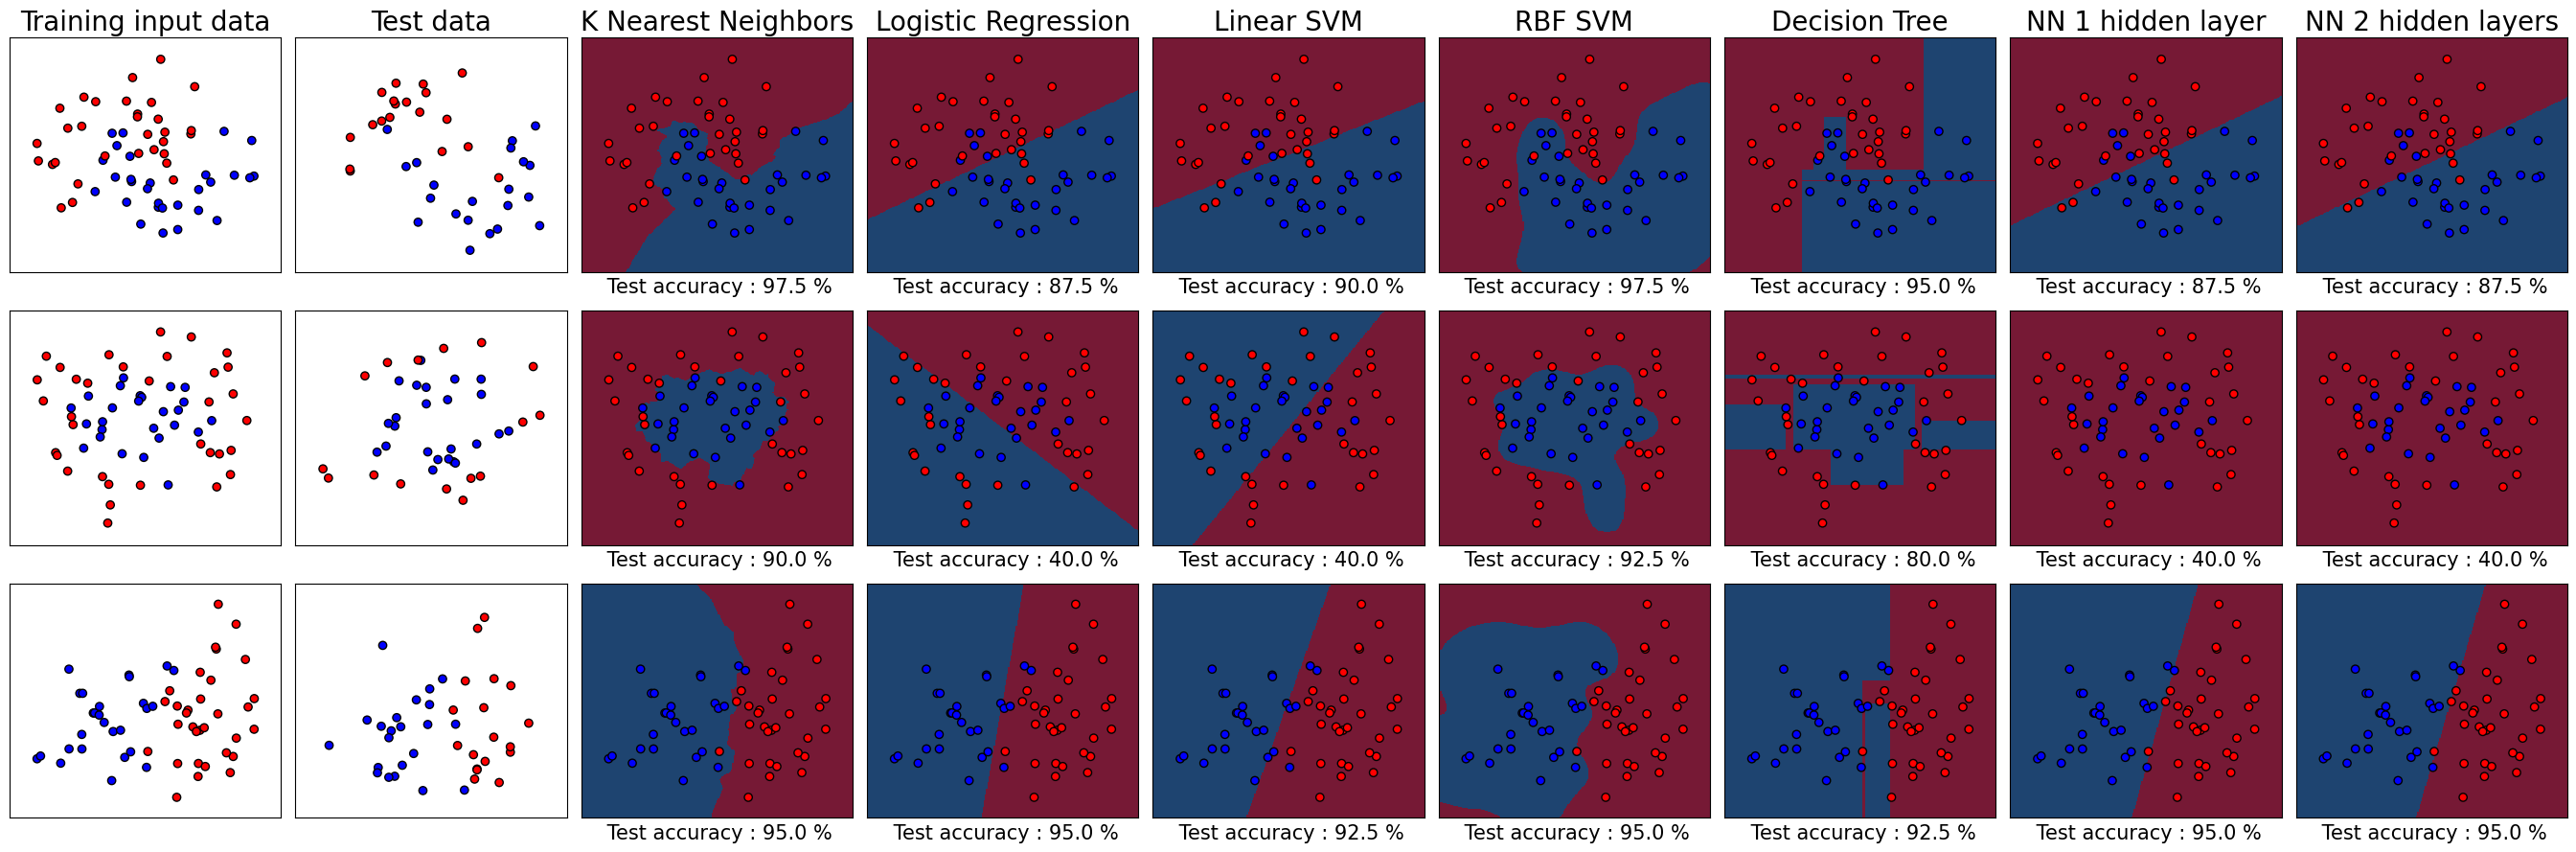

In [3]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(5),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma=4, C=1),
    DecisionTreeClassifier(max_depth=9),
    MLPClassifier(learning_rate_init=0.05, max_iter=3000, hidden_layer_sizes=(20), batch_size=60, learning_rate='constant',  activation='logistic', solver='sgd', tol=1e-4),
    MLPClassifier(learning_rate_init=0.05, max_iter=4000, hidden_layer_sizes=(20, 20), batch_size=60, learning_rate='constant', activation='logistic', solver='sgd', tol=1e-4)]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

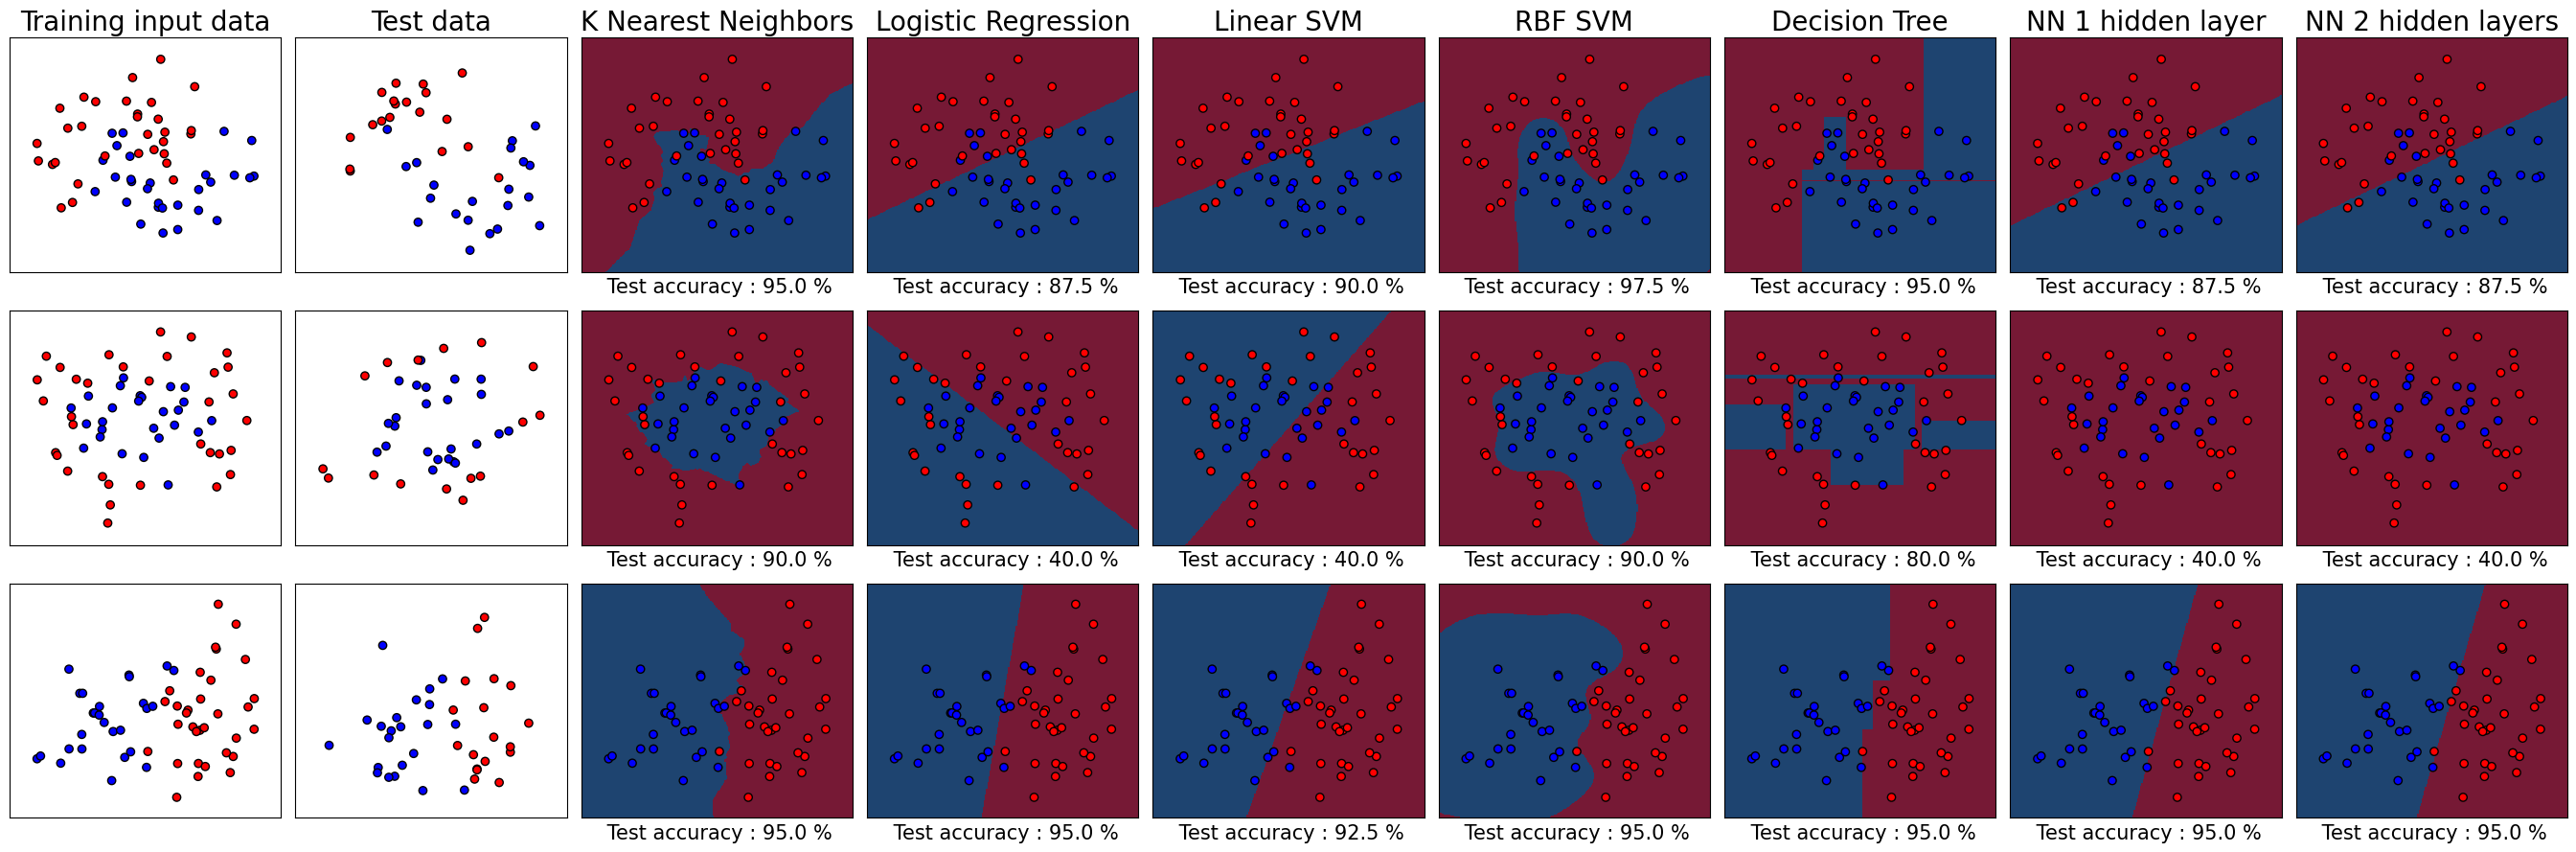

In [4]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(7),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=5000),
    SVC(gamma=2, C=3),
    DecisionTreeClassifier(max_depth=11),
    MLPClassifier(learning_rate_init=0.05, max_iter=3000, hidden_layer_sizes=(30), batch_size=60, learning_rate='constant',  activation='logistic', solver='sgd', tol=1e-4),
    MLPClassifier(learning_rate_init=0.05, max_iter=4000, hidden_layer_sizes=(30, 30), batch_size=60, learning_rate='constant', activation='logistic', solver='sgd', tol=1e-4)]

# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()